In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
import os

DATA_DIR = "../data/tomato_binary"  # ✅ correct because notebook is inside /notebooks

classes = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]
print("Classes found:", classes)

for cls in classes:
    cls_path = os.path.join(DATA_DIR, cls)
    print(f"{cls}: {len(os.listdir(cls_path))} images")


Classes found: ['Tomato_healthy', 'Tomato_Late_blight']
Tomato_healthy: 1591 images
Tomato_Late_blight: 1909 images


In [5]:
IMG_SIZE = (224, 224)   # best for MobileNet/transfer learning
BATCH_SIZE = 32         # good default (use 16 if your PC is slow)

print("IMG_SIZE:", IMG_SIZE)
print("BATCH_SIZE:", BATCH_SIZE)


IMG_SIZE: (224, 224)
BATCH_SIZE: 32


In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)


Found 3500 files belonging to 2 classes.
Using 2800 files for training.
Found 3500 files belonging to 2 classes.
Using 700 files for validation.


In [7]:
# Number of batches in validation set
val_batches = tf.data.experimental.cardinality(val_ds).numpy()

# Take half of validation as test
test_batches = val_batches // 2

test_ds = val_ds.take(test_batches)
val_ds = val_ds.skip(test_batches)

print("Validation batches:", val_batches)
print("Test batches:", test_batches)


Validation batches: 22
Test batches: 11


In [8]:
print("Class names:", train_ds.class_names)


Class names: ['Tomato_Late_blight', 'Tomato_healthy']


In [9]:
import json

class_names = ["Tomato_Late_blight", "Tomato_healthy"]

with open("../models/tomato_class_names.json", "w") as f:
    json.dump(class_names, f)

print("✅ tomato_class_names.json saved")


✅ tomato_class_names.json saved


In [44]:
for images, labels in train_ds.take(1):
    print("Images batch shape:", images.shape)   # (batch_size, height, width, channels)
    print("Labels batch shape:", labels.shape)   # (batch_size,)
    print("Image dtype:", images.dtype)
    print("Label dtype:", labels.dtype)


Images batch shape: (32, 224, 224, 3)
Labels batch shape: (32, 1)
Image dtype: <dtype: 'float32'>
Label dtype: <dtype: 'float32'>


C:\Users\94770\AppData\Local\Temp\ipykernel_13172\1579627851.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_name = train_ds.class_names[int(labels[i].numpy())]


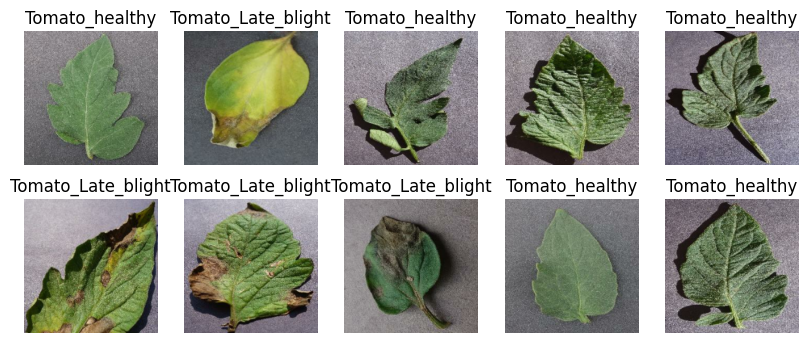

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

for images, labels in train_ds.take(1):
    for i in range(10):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        # labels are 0/1 in binary mode
        label_name = train_ds.class_names[int(labels[i].numpy())]
        plt.title(label_name)
        
        plt.axis("off")

plt.show()


In [46]:
for iamge , label in train_ds.take(1):
    for i in range(1):
        print(iamge)

tf.Tensor(
[[[[  3.         3.         3.      ]
   [  3.         3.         3.      ]
   [  3.         3.         3.      ]
   ...
   [  3.         3.         3.      ]
   [  3.         3.         3.      ]
   [  3.         3.         3.      ]]

  [[  3.         3.         3.      ]
   [  3.         3.         3.      ]
   [  3.         3.         3.      ]
   ...
   [  3.         3.         3.      ]
   [  3.         3.         3.      ]
   [  3.         3.         3.      ]]

  [[  3.         3.         3.      ]
   [  3.         3.         3.      ]
   [  3.         3.         3.      ]
   ...
   [  3.         3.         3.      ]
   [  3.         3.         3.      ]
   [  3.         3.         3.      ]]

  ...

  [[  3.         3.         3.      ]
   [  3.         3.         3.      ]
   [  3.         3.         3.      ]
   ...
   [  3.         3.         3.      ]
   [  3.         3.         3.      ]
   [  3.         3.         3.      ]]

  [[  3.         3.         3.    

In [47]:
class_names = train_ds.class_names
print("Class names:", class_names)


Class names: ['Tomato_Late_blight', 'Tomato_healthy']


In [51]:
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds   = val_ds.map(lambda x, y: (x / 255.0, y))
test_ds  = test_ds.map(lambda x, y: (x / 255.0, y))


In [49]:
for iamge , label in train_ds.take(1):
    for i in range(1):
        print(iamge)

tf.Tensor(
[[[[0.5694678  0.5459384  0.56162465]
   [0.57024807 0.54671866 0.56240493]
   [0.57430977 0.55078036 0.5664666 ]
   ...
   [0.5157062  0.4843337  0.47649056]
   [0.46778673 0.43641418 0.42857105]
   [0.37923026 0.3478577  0.34001458]]

  [[0.5837535  0.5602241  0.5759104 ]
   [0.58339334 0.5598639  0.5755502 ]
   [0.5797719  0.55624247 0.57192874]
   ...
   [0.3964785  0.36510596 0.35726282]
   [0.40736306 0.3759905  0.36814737]
   [0.51654863 0.48517603 0.4773329 ]]

  [[0.597479   0.5739496  0.58963585]
   [0.5957983  0.5722689  0.5879552 ]
   [0.582533   0.5590036  0.57468987]
   ...
   [0.47573042 0.44435787 0.43651474]
   [0.43449342 0.40312088 0.39527774]
   [0.46790802 0.43653548 0.42869234]]

  ...

  [[0.5805925  0.56490624 0.5688278 ]
   [0.5655664  0.54988015 0.5538017 ]
   [0.59579825 0.580112   0.58403355]
   ...
   [0.45456156 0.423189   0.41534588]
   [0.44803935 0.4166668  0.40882367]
   [0.44239685 0.4110243  0.40318117]]

  [[0.5978992  0.5822129  0.586134

In [15]:
import tensorflow as tf

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
])


In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [17]:
model = models.Sequential([
    # --------- Input Layer ----------
    layers.Input(shape=(224, 224, 3)),

    # --------- Conv Block 1 ----------
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    # --------- Conv Block 2 ----------
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    # --------- Conv Block 3 ----------
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    # --------- Flatten ----------
    layers.Flatten(),

    # --------- Fully Connected ----------
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),   # prevents overfitting

    # --------- Output Layer ----------
    layers.Dense(1, activation="sigmoid")  # binary classification
])


In [18]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [19]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 75s 714ms/step - accuracy: 0.7836 - loss: 0.4398 - val_accuracy: 0.9138 - val_loss: 0.1770
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 54s 617ms/step - accuracy: 0.9764 - loss: 0.0996 - val_accuracy: 0.9914 - val_loss: 0.0317
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 57s 642ms/step - accuracy: 0.9596 - loss: 0.1382 - val_accuracy: 0.9943 - val_loss: 0.0277
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 60s 681ms/step - accuracy: 0.9721 - loss: 0.0782 - val_accuracy: 0.9856 - val_loss: 0.0357
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 59s 665ms/step - accuracy: 0.9925 - loss: 0.0316 - val_accuracy: 0.9943 - val_loss: 0.0264
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 56s 633ms/step - accuracy: 0.9957 - loss: 0.0179 - val_accuracy: 0.9971 - val_loss: 0.0047
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 63s 717ms/step - accuracy: 0.9882 - loss: 0.0373 - val_accuracy: 0.9943 - val_loss: 0.0260
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 57s 646ms/step - accuracy: 0.9964 - loss: 0.0128 - val_accu

In [21]:
history.history

{'accuracy': [0.7835714221000671,
  0.9764285683631897,
  0.9596428275108337,
  0.9721428751945496,
  0.9925000071525574,
  0.9957143068313599,
  0.9882143139839172,
  0.9964285492897034,
  0.9928571581840515,
  0.9967857003211975,
  0.9992856979370117,
  0.989642858505249,
  0.9921428561210632,
  0.9871428608894348,
  0.9839285612106323,
  0.9957143068313599,
  0.9867857098579407,
  0.9964285492897034,
  0.9835714101791382,
  0.9950000047683716],
 'loss': [0.4397960901260376,
  0.09957753121852875,
  0.13822363317012787,
  0.07821934670209885,
  0.031557586044073105,
  0.01794852688908577,
  0.03727680444717407,
  0.012826993130147457,
  0.020060060545802116,
  0.008863420225679874,
  0.0037975504528731108,
  0.030301516875624657,
  0.01905534602701664,
  0.032904595136642456,
  0.04538952559232712,
  0.018461937084794044,
  0.03391260281205177,
  0.014578062109649181,
  0.043147966265678406,
  0.011720262467861176],
 'val_accuracy': [0.9137930870056152,
  0.9913793206214905,
  0.9942

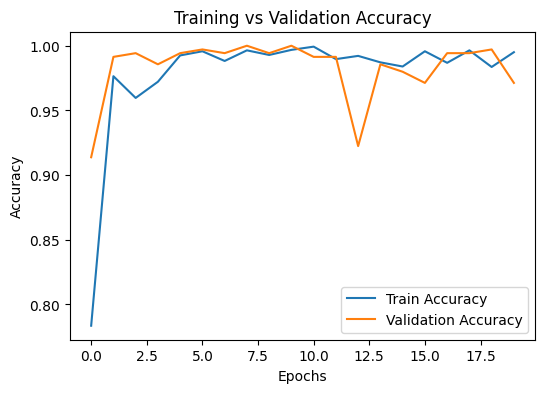

In [22]:
plt.figure(figsize=(6, 4))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

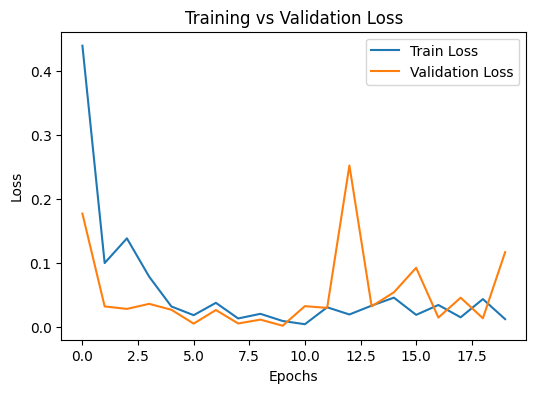

In [23]:
plt.figure(figsize=(6, 4))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

In [24]:
precision = tf.keras.metrics.Precision()
reacall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.Accuracy()

In [26]:
for batch in test_ds.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    precision.update_state(y, yhat)
    reacall.update_state(y, yhat)
   
    print("Precision: ", precision.result().numpy())
    print("Reacall: ", reacall.result().numpy())
    
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
Precision:  0.9310345
Reacall:  1.0


In [27]:
MODEL_PATH = "../models/tomato_disease_cnn.keras"
model.save(MODEL_PATH)

print("✅ Model saved at:", MODEL_PATH)


✅ Model saved at: ../models/tomato_disease_cnn.keras


In [1]:
import cv2

class_names = ["Tomato_Late_blight", "Tomato_healthy"]  # change order if needed
print(class_names)


['Tomato_Late_blight', 'Tomato_healthy']


In [2]:
img_path = r"../data/tomato_binary/Tomato_healthy/0a0d6a11-ddd6-4dac-8469-d5f65af5afca___RS_HL 0555.JPG"

# Read image (BGR)
img_bgr = cv2.imread(img_path)

if img_bgr is None:
    raise FileNotFoundError(f"Image not found: {img_path}")

# Convert BGR → RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Resize to model size
img_resized = cv2.resize(img_rgb, IMG_SIZE)

# Normalize (0-1)
img_norm = img_resized.astype(np.float32) / 255.0

# Add batch dimension (1, H, W, C)
img_input = np.expand_dims(img_norm, axis=0)

print("Input shape:", img_input.shape)


NameError: name 'IMG_SIZE' is not defined

In [55]:
pred = model.predict(img_input)[0][0]

if pred >= 0.5:
    predicted_class = class_names[1]
    confidence = pred
else:
    predicted_class = class_names[0]
    confidence = 1 - pred

print("Predicted:", predicted_class)
print("Confidence:", round(float(confidence * 100), 2), "%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
Predicted: Tomato_healthy
Confidence: 100.0 %


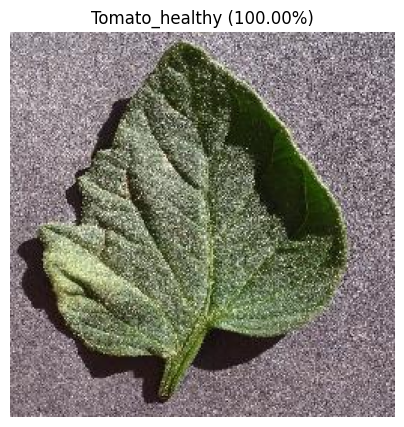

In [57]:
plt.figure(figsize=(5,5))
plt.imshow(img_rgb)
plt.title(f"{predicted_class} ({confidence*100:.2f}%)")
plt.axis("off")
plt.show()
